In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import json

mlb = LabelBinarizer()
with open("data/labeled_sentense.json", "rb") as file:
    datalist = json.load(file)

with open("data/labeled_sentense2.json", "rb") as file:
    datalist+=json.load(file)

with open("data/labeled_sentense3.json","rb") as file:
    datalist+=json.load(file)

with open("data/labeled_sentense4.json","rb") as file:
    datalist+=json.load(file)



In [3]:
X=[]
y=[]
for data in datalist:
    sentense=data[0]
    label=data[1]
    X.append(sentense)
    y.append(label)
print("Data num: "+str(len(X)))
#print(set(y))

mydict={}

for d in y:
    mydict.setdefault(d,0)
    mydict[d]=mydict[d]+1

for key in mydict:
    print(key+": "+str(mydict[key]))   

#print(mydict)

Data num: 20000
food: 7860
atmosphere: 1351
parking: 47
service: 4967
none: 3386
hygiene: 498
location: 397
None: 280
food, service: 102
Food: 294
Service: 459
Atmosphere: 118
Hygiene: 60
food, service, atmosphere: 10
None.: 1
food, atmosphere: 23
transportation: 22
food, hygiene, atmosphere, service, location: 1
Location: 25
hygiene, food, service: 1
food
: 1
food and service: 9
Error: 500, {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
}
: 6
food and atmosphere: 2
food and transportation: 1
Label: location: 1
Great! Let's get started. Please provide the comment for me to label.: 1
service and food: 1
service, hygiene: 1
food, hygiene: 5
Parking: 4
food, hygiene, atmosphere, service, location, parking, transportation, none: 1
Transportation: 2
food + service: 1
food,service: 1
atmosphere, service: 4
Food, hygiene: 1
Food.: 1
Great! Let's get started then. Plea

In [2]:
import re
X=[]
y=[]
for data in datalist:
    sentense=data[0]
    label=re.sub(r'^[^a-zA-Z]+|[^a-zA-Z]+$', '', data[1]).lower()
    if label=="none" or label=="food" or label=="service" or label=="atmosphere" or label=="hygiene":
        X.append(sentense)
        y.append(label)
    elif label=="location" or label=="parking" or label=="transportation":
        X.append(sentense)
        y.append("location")
print("Data num",len(X))

mydict={}

for d in y:
    mydict.setdefault(d,0)
    mydict[d]=mydict[d]+1

for key in mydict:
    print(key+": "+str(mydict[key]))  


Data num 19776
food: 8157
atmosphere: 1470
location: 497
service: 5427
none: 3667
hygiene: 558


In [3]:
import random
def balanceData(X,y,mininum,maxnum):
    mydict={}
    for i in range(len(y)):
        mydict.setdefault(y[i],[])
        mydict[y[i]].append(X[i])
    for key in mydict:
        originalnum=len(mydict[key])
        if originalnum<mininum:
            for i in range(mininum-originalnum):
                index=random.randint(0,len(mydict[key])-1)
                X.append(mydict[key][index])
                y.append(key)
        else:
            for i in range(originalnum-maxnum):
                index=random.randint(0,len(mydict[key])-1)
                deleted=mydict[key][index]
                index2=X.index(deleted)
                del mydict[key][index]
                del X[index2]
                del y[index2]



In [17]:
balanceData(X,y,800,700)

In [4]:
mydict={}

for d in y:
    mydict.setdefault(d,0)
    mydict[d]=mydict[d]+1

    

print(mydict)

{'food': 8157, 'atmosphere': 1470, 'location': 497, 'service': 5427, 'none': 3667, 'hygiene': 558}


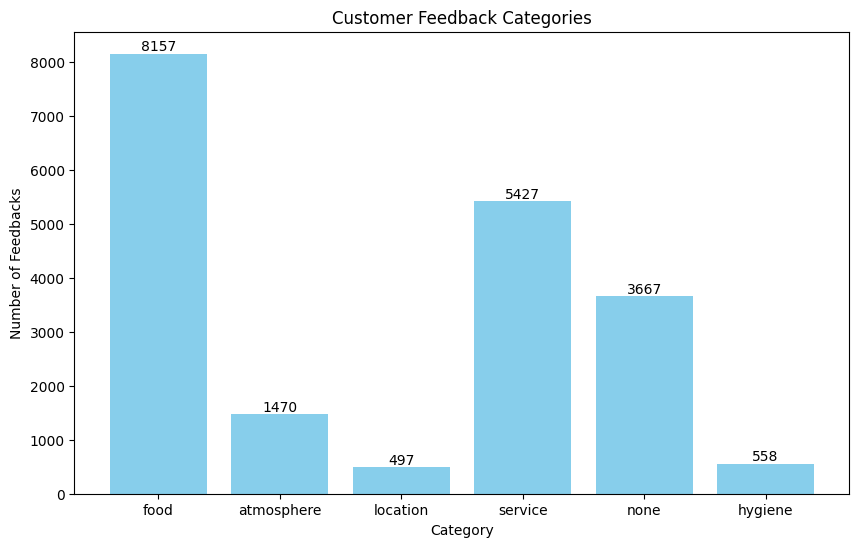

In [5]:
import matplotlib.pyplot as plt
categories = list(mydict.keys())
values = list(mydict.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.title('Customer Feedback Categories')
plt.xlabel('Category')
plt.ylabel('Number of Feedbacks')

plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.cluster import KMeansClusterer,cosine_distance,euclidean_distance
from sklearn import mixture
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from imblearn.over_sampling import SMOTE

def cluster_kmean(train_text, test_text, train_label,test_label):
    tfidf=TfidfVectorizer(stop_words="english", min_df=0.0001,lowercase=True)
    train_dtm=tfidf.fit_transform(train_text)
    sampling_strategy = {'food': 10000, 'atmosphere': 8000, 'location': 4000, 'service': 8000, 'none': 8000, 'hygiene': 4000}
    sm = SMOTE(random_state=42,sampling_strategy=sampling_strategy)
    train_dtm,_ = sm.fit_resample(train_dtm, train_label)
    test_dtm=tfidf.transform(test_text)
    num_clusters = 30
    clusterer = KMeansClusterer(num_clusters, \
                                cosine_distance, \
                                repeats=1)
    clusterer.cluster(train_dtm.toarray(), assign_clusters=True)
    predicted = [clusterer.classify(v) for v in test_dtm.toarray()]

    confusion_df = pd.DataFrame(list(zip(test_label, predicted)),\
                            columns = ["label", "cluster"])
    cross=pd.crosstab( index=confusion_df.cluster, columns=confusion_df.label)
    labelmap = dict(zip(cross.index,cross.idxmax(axis=1)))
    predicted_target=[labelmap[i] \
                  for i in predicted]
    print(metrics.classification_report(test_label, predicted_target)) 

In [12]:
cluster_kmean(X_train, X_test, y_train, y_test)

c:\Users\HengZhao\AppData\Local\Programs\Python\Python310\lib\site-packages\nltk\cluster\util.py:130: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


              precision    recall  f1-score   support

  atmosphere       0.35      0.21      0.26       277
        food       0.68      0.74      0.71      1641
     hygiene       0.51      0.32      0.39       107
    location       0.58      0.37      0.45        94
        none       0.44      0.37      0.40       763
     service       0.58      0.67      0.62      1074

    accuracy                           0.59      3956
   macro avg       0.52      0.45      0.47      3956
weighted avg       0.58      0.59      0.58      3956



In [29]:
def cluster_gmm(train_text, test_text, train_label, test_label):
    
 
    tfidf=TfidfVectorizer(stop_words="english", min_df=0.005,max_features=1000,lowercase=True)
    train_dtm=tfidf.fit_transform(train_text)
    test_dtm=tfidf.transform(test_text)
    #sampling_strategy = {'food': 10000, 'atmosphere': 10000, 'location': 8000, 'service': 10000, 'none': 10000, 'hygiene': 10000}
    #sm = SMOTE(random_state=42,sampling_strategy=sampling_strategy)
    #train_dtm,_ = sm.fit_resample(train_dtm, train_label)

    lowest_bic = np.infty   # initial BIC is set to infinity
    best_gmm = None

    n_components_range = range(5,20)    # The number of clusters

    cv_types = ['spherical', 'tied', 'diag']  
    for cv_type in cv_types:
    
        for n_components in n_components_range:
            
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                        # n_init=2
                                        covariance_type=cv_type, random_state=42,n_init=10)
            gmm.fit(train_dtm.toarray())
            
            bic = gmm.bic(train_dtm.toarray())  # get Model BIC
            
            if bic < lowest_bic:  # save the model with lowest BIC sofar
                lowest_bic = bic
                best_gmm = gmm
    predicted = best_gmm.predict(test_dtm.toarray())
    confusion_df = pd.DataFrame(list(zip(test_label, predicted)),\
                            columns = ["label", "cluster"])
    #print(confusion_df.head())
    cross=pd.crosstab( index=confusion_df.cluster, columns=confusion_df.label)
    #print(cross)
    labelmap = dict(zip(cross.index,cross.idxmax(axis=1)))
    #print(labelmap)
    predicted_target=[labelmap[i] \
                  for i in predicted]
    print(metrics.classification_report(test_label, predicted_target)) 

In [30]:
cluster_gmm(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

  atmosphere       0.00      0.00      0.00       277
        food       0.57      0.65      0.61      1641
     hygiene       0.00      0.00      0.00       107
    location       0.00      0.00      0.00        94
        none       0.35      0.50      0.41       763
     service       0.51      0.46      0.49      1074

    accuracy                           0.49      3956
   macro avg       0.24      0.27      0.25      3956
weighted avg       0.44      0.49      0.46      3956



c:\Users\HengZhao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HengZhao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HengZhao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [27]:
from sklearn.decomposition import LatentDirichletAllocation
def cluster_lda(train_text, test_text, train_label, test_label):
    tfidf=TfidfVectorizer(stop_words="english", min_df=0.005,max_features=3000,ngram_range=(1,1),lowercase=True)
    train_dtm=tfidf.fit_transform(train_text)
    test_dtm=tfidf.transform(test_text)
    sampling_strategy = {'food': 10000, 'atmosphere': 6000, 'location': 4000, 'service': 8000, 'none': 8000, 'hygiene': 8000}
    sm = SMOTE(random_state=42,sampling_strategy=sampling_strategy)
    train_dtm,_ = sm.fit_resample(train_dtm, train_label)
    num_clusters = 30
    lda = LatentDirichletAllocation(n_components=num_clusters, \
                                    max_iter=40,verbose=0,
                                    evaluate_every=1, n_jobs=1,
                                    random_state=0).fit(train_dtm)
    topic_distributions = lda.transform(test_dtm)
    #print(topic_distributions)
    # Assign the most prominent topic to each sentence
    predicted = topic_distributions.argmax(axis=1)

    #result=aggregateTopic(allsentense[:200],most_prominent_topic[:200])
    confusion_df = pd.DataFrame(list(zip(test_label, predicted)),\
                            columns = ["label", "cluster"])
    #print(confusion_df.head())
    cross=pd.crosstab( index=confusion_df.cluster, columns=confusion_df.label)
    #print(cross)
    labelmap = dict(zip(cross.index,cross.idxmax(axis=1)))
    #print(labelmap)
    predicted_target=[labelmap[i] \
                  for i in predicted]
    print(metrics.classification_report(test_label, predicted_target)) 

In [28]:
cluster_lda(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

  atmosphere       0.00      0.00      0.00       277
        food       0.53      0.75      0.62      1641
     hygiene       0.00      0.00      0.00       107
    location       0.00      0.00      0.00        94
        none       0.39      0.39      0.39       763
     service       0.48      0.39      0.43      1074

    accuracy                           0.49      3956
   macro avg       0.23      0.25      0.24      3956
weighted avg       0.42      0.49      0.45      3956



c:\Users\HengZhao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HengZhao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HengZhao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [18]:
def getMapping(topic_distributions,labels):
    labelmap={}
    for j in range(topic_distributions.shape[1]):
        score={}
        for i in range(topic_distributions.shape[0]):
            score[labels[i]]=score.setdefault(labels[i],0)+topic_distributions[i][j]
        maxkey=labels[0]
        for key in score:
            if score[key]>score[maxkey]:
                maxkey=key
        labelmap[j]=maxkey
    return labelmap


In [25]:
from sklearn.decomposition import LatentDirichletAllocation
def cluster_lda(train_text, test_text, train_label, test_label):
    tfidf=TfidfVectorizer(stop_words="english", min_df=0.005,max_features=3000,ngram_range=(1,1),lowercase=True)
    train_dtm=tfidf.fit_transform(train_text)
    test_dtm=tfidf.transform(test_text)
    sampling_strategy = {'food': 10000, 'atmosphere': 6000, 'location': 4000, 'service': 8000, 'none': 8000, 'hygiene': 4000}
    sm = SMOTE(random_state=42,sampling_strategy=sampling_strategy)
    train_dtm,train_label = sm.fit_resample(train_dtm, train_label)
    num_clusters = 30
    lda = LatentDirichletAllocation(n_components=num_clusters, \
                                    max_iter=40,verbose=0,
                                    evaluate_every=1, n_jobs=1,
                                    random_state=0).fit(train_dtm)
    train_topic_distributions = lda.transform(train_dtm)
    test_topic_distributions = lda.transform(test_dtm)
    #print(topic_distributions)
    # Assign the most prominent topic to each sentence
    predicted = test_topic_distributions.argmax(axis=1)

    labelmap =getMapping(train_topic_distributions,train_label)
    #print(labelmap)
    predicted_target=[labelmap[i] \
                  for i in predicted]
    print(metrics.classification_report(test_label, predicted_target)) 

In [26]:
cluster_lda(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

  atmosphere       0.16      0.06      0.09       277
        food       0.56      0.59      0.58      1641
     hygiene       0.13      0.33      0.19       107
    location       0.24      0.22      0.23        94
        none       0.28      0.17      0.21       763
     service       0.37      0.45      0.41      1074

    accuracy                           0.42      3956
   macro avg       0.29      0.30      0.28      3956
weighted avg       0.41      0.42      0.41      3956



In [35]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
def cluster_lda(train_text, test_text, train_label, test_label):
    
    lb = LabelBinarizer()            
    tfidf=TfidfVectorizer(stop_words="english", min_df=0.005,max_features=3000,ngram_range=(1,1),lowercase=True)
    train_dtm=tfidf.fit_transform(train_text)
    test_dtm=tfidf.transform(test_text)
    sampling_strategy = {'food': 10000, 'atmosphere': 6000, 'location': 4000, 'service': 8000, 'none': 8000, 'hygiene': 8000}
    sm = SMOTE(random_state=42,sampling_strategy=sampling_strategy)
    #train_dtm,train_label = sm.fit_resample(train_dtm, train_label)
    num_clusters = 10
    lda = LatentDirichletAllocation(n_components=num_clusters, \
                                    max_iter=40,verbose=0,
                                    evaluate_every=1, n_jobs=1,
                                    random_state=0).fit(train_dtm)
    

    train_topic_distributions = lda.transform(train_dtm)
    test_topic_distributions = lda.transform(test_dtm)


    print(train_topic_distributions)
    train_y=lb.fit_transform(train_label)
    test_y=lb.transform(test_label)

    clf=OneVsRestClassifier(LinearSVC())
    clf.fit(train_topic_distributions,train_y)
    y_pred=clf.predict(test_topic_distributions)
    print(y_pred.shape)
    report=classification_report(test_y,y_pred,target_names=lb.classes_)
    print(report)
    print("Accuracy:", accuracy_score(test_y, y_pred))

In [36]:
cluster_lda(X_train, X_test, y_train, y_test)

[[0.04147964 0.31375665 0.04148711 ... 0.04147964 0.04147964 0.35437633]
 [0.02758572 0.09801057 0.17750565 ... 0.02761039 0.02758572 0.09102718]
 [0.04208838 0.0420793  0.0420793  ... 0.04208386 0.04208422 0.26337682]
 ...
 [0.26242148 0.03663742 0.03663742 ... 0.03663742 0.03663742 0.03663742]
 [0.27420193 0.28175249 0.03705943 ... 0.03705943 0.03705943 0.18462957]
 [0.05       0.05       0.05       ... 0.05       0.05       0.05      ]]
(3956, 6)
              precision    recall  f1-score   support

  atmosphere       0.00      0.00      0.00       277
        food       0.61      0.34      0.43      1641
     hygiene       0.00      0.00      0.00       107
    location       0.00      0.00      0.00        94
        none       0.00      0.00      0.00       763
     service       0.57      0.12      0.20      1074

   micro avg       0.60      0.17      0.27      3956
   macro avg       0.20      0.08      0.11      3956
weighted avg       0.41      0.17      0.23      3956
 sam

c:\Users\HengZhao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HengZhao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

def cluster_lda(train_text, test_text, train_label, test_label):
    
    lb = LabelBinarizer()            
    tfidf=TfidfVectorizer(stop_words="english", min_df=0.005,ngram_range=(1,1),lowercase=True)
    train_dtm=tfidf.fit_transform(train_text)
    test_dtm=tfidf.transform(test_text)
    sampling_strategy = {'food': 10000, 'atmosphere': 6000, 'location': 4000, 'service': 8000, 'none': 8000, 'hygiene': 8000}
    sm = SMOTE(random_state=42,sampling_strategy=sampling_strategy)
    #train_dtm,train_label = sm.fit_resample(train_dtm, train_label)
    num_clusters = 128
    lda = LatentDirichletAllocation(n_components=num_clusters, \
                                    max_iter=40,verbose=0,
                                    evaluate_every=1, n_jobs=1,
                                    random_state=0).fit(train_dtm)
    

    train_topic_distributions = lda.transform(train_dtm)
    test_topic_distributions = lda.transform(test_dtm)


    print(train_topic_distributions)
    train_y=lb.fit_transform(train_label)
    test_y=lb.transform(test_label)

    model = Sequential([
    Dense(16, activation='relu', input_shape=(train_topic_distributions.shape[1],)),
    Dense(32, activation='sigmoid'),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')  
])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    scaler = MinMaxScaler()
    X_train_scaled=scaler.fit_transform(train_topic_distributions)
    X_test_scaled=scaler.fit_transform(test_topic_distributions)

    model.fit(X_train_scaled, train_y, epochs=300, batch_size=64)

    y_pred=model.predict(X_test_scaled)

    y_pred_argmax = np.argmax(y_pred, axis=1)

    y_pred_binary = np.zeros_like(y_pred)
    for i, class_index in enumerate(y_pred_argmax):
        y_pred_binary[i, class_index] = 1



    print(y_pred_binary.shape)
    report=classification_report(test_y,y_pred_binary,target_names=lb.classes_)
    print(report)
    print("Accuracy:", accuracy_score(test_y, y_pred_binary))

In [38]:
cluster_lda(X_train, X_test, y_train, y_test)

[[0.0032406  0.0032406  0.0032406  ... 0.0032406  0.0032406  0.0032406 ]
 [0.00215513 0.00215513 0.08796688 ... 0.00215513 0.00215513 0.00215513]
 [0.00328745 0.00328745 0.00328745 ... 0.00328745 0.00328745 0.00328745]
 ...
 [0.0028623  0.0028623  0.0028623  ... 0.0028623  0.0028623  0.21327116]
 [0.00289527 0.00289527 0.00289527 ... 0.00289527 0.00289527 0.00289527]
 [0.00390625 0.00390625 0.00390625 ... 0.00390625 0.00390625 0.00390625]]


Epoch 1/300


248/248 [==============================] - 1s 930us/step - loss: 1.4064 - accuracy: 0.4347
Epoch 2/300
248/248 [==============================] - 0s 821us/step - loss: 1.1631 - accuracy: 0.5811
Epoch 3/300
248/248 [==============================] - 0s 836us/step - loss: 1.1024 - accuracy: 0.6058
Epoch 4/300
248/248 [==============================] - 0s 843us/step - loss: 1.0747 - accuracy: 0.6119
Epoch 5/300
248/248 [==============================] - 0s 829us/step - loss: 1.0563 - accuracy: 0.6171
Epoch 6/300
248/248 [================

In [166]:
def tokenize(doc, lemmatized=False, remove_stopword=False,
             remove_punct=True, pos_tag=False):
    spacy_doc = nlp(doc)
    tokens = []
    for token in spacy_doc:
        if remove_punct and token.is_punct:
            continue
        if remove_stopword and token.is_stop:
            continue
        if not token.text.strip():
            continue
        words = token.lemma_ if lemmatized else token.text
        if pos_tag:
            tokens.append((words.lower(), token.pos_))
        else:
            tokens.append(words.lower())
    return tokens

def get_doc_tokens(tokens):
    token_count = {}
    for token in tokens:
        token_count[token] = token_count.get(token, 0) + 1
    return token_count

def compute_tfidf(tokenized_docs):
    docs_tokens = {idx: get_doc_tokens(doc)for idx, doc in enumerate(tokenized_docs)}
    dtm = pd.DataFrame.from_dict(docs_tokens, orient="index")
    dtm = dtm.fillna(0)
    dtm = dtm.sort_index(axis=0)
    tf = dtm.values
    doc_len = tf.sum(axis=1, keepdims=True)
    tf = np.divide(tf, doc_len)
    df = np.where(tf > 0, 1, 0)
    smoothed_idf = np.log(np.divide(len(tokenized_docs) + 1, np.sum(df, axis=0) + 1)) + 1
    smoothed_tf_idf = tf * smoothed_idf
    terms = dtm.columns.to_list()
    return smoothed_tf_idf,terms

def make_tfidf(datas,onlyNoun=False):
    tokenslist=[]
    for data in datas:
        tokens=tokenize(data,lemmatized=True, remove_stopword=True,pos_tag=onlyNoun)
        if not onlyNoun:
            tokenslist.append(tokens)
        else:
            newtokens=[]
            for (token,tag) in tokens:
                if tag=="NOUN" or tag=="PROPN":
                    newtokens.append(token)
            tokenslist.append(newtokens)
    return compute_tfidf(tokenslist)


In [188]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler



def ANN_classificate(train_text, test_text, train_label, test_label):
    tfidf=TfidfVectorizer(stop_words="english", min_df=0.005,ngram_range=(1,1),lowercase=True)
    train_dtm=tfidf.fit_transform(train_text).toarray()
    test_dtm=tfidf.transform(test_text).toarray()
    lb = LabelBinarizer()            
    sampling_strategy = {'food': 10000, 'atmosphere': 6000, 'location': 4000, 'service': 8000, 'none': 8000, 'hygiene': 8000}
    sm = SMOTE(random_state=42,sampling_strategy=sampling_strategy)
    #train_dtm,train_label = sm.fit_resample(train_dtm, train_label)
    train_y=lb.fit_transform(train_label)
    test_y=lb.transform(test_label)


    model = Sequential([
    Dense(16, activation='relu', input_shape=(train_dtm.shape[1],)),
    Dense(32, activation='sigmoid'),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')  
])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    scaler = MinMaxScaler()
    X_train_scaled=scaler.fit_transform(train_dtm)
    X_test_scaled=scaler.fit_transform(test_dtm)

    model.fit(X_train_scaled, train_y, epochs=200, batch_size=64)

    y_pred=model.predict(X_test_scaled)

    y_pred_argmax = np.argmax(y_pred, axis=1)

    y_pred_binary = np.zeros_like(y_pred)
    for i, class_index in enumerate(y_pred_argmax):
        y_pred_binary[i, class_index] = 1



    print(y_pred_binary.shape)
    report=classification_report(test_y,y_pred_binary)
    print(report)
    print("Accuracy:", accuracy_score(test_y, y_pred_binary))

In [189]:
ANN_classificate(X_train, X_test, y_train, y_test)

Epoch 1/200
248/248 [==============================] - 1s 885us/step - loss: 1.4209 - accuracy: 0.4056
Epoch 2/200
248/248 [==============================] - 0s 848us/step - loss: 1.0744 - accuracy: 0.6097
Epoch 3/200
248/248 [==============================] - 0s 833us/step - loss: 0.9433 - accuracy: 0.6594
Epoch 4/200
248/248 [==============================] - 0s 795us/step - loss: 0.8902 - accuracy: 0.6803
Epoch 5/200
248/248 [==============================] - 0s 773us/step - loss: 0.8592 - accuracy: 0.6877
Epoch 6/200
248/248 [==============================] - 0s 845us/step - loss: 0.8371 - accuracy: 0.6973
Epoch 7/200
248/248 [==============================] - 0s 841us/step - loss: 0.8239 - accuracy: 0.7025
Epoch 8/200
248/248 [==============================] - 0s 821us/step - loss: 0.8126 - accuracy: 0.7100
Epoch 9/200
248/248 [==============================] - 0s 775us/step - loss: 0.8037 - accuracy: 0.7149
Epoch 10/200
248/248 [==============================] - 0s 786us/step - l

In [200]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from sklearn.preprocessing import MinMaxScaler



def CNN_classificate(train_text, test_text, train_label, test_label):
    tfidf=TfidfVectorizer(stop_words="english", min_df=0.005,ngram_range=(1,1),lowercase=True)
    train_dtm=tfidf.fit_transform(train_text).toarray()
    test_dtm=tfidf.transform(test_text).toarray()
    lb = LabelBinarizer()            
    sampling_strategy = {'food': 10000, 'atmosphere': 6000, 'location': 4000, 'service': 8000, 'none': 8000, 'hygiene': 8000}
    sm = SMOTE(random_state=42,sampling_strategy=sampling_strategy)
    #train_dtm,train_label = sm.fit_resample(train_dtm, train_label)
    train_y=lb.fit_transform(train_label)
    test_y=lb.transform(test_label)


    model = Sequential()

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(train_dtm.shape[1],1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(6, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    scaler = MinMaxScaler()
    X_train_scaled=scaler.fit_transform(train_dtm)
    X_test_scaled=scaler.fit_transform(test_dtm)

    model.fit(X_train_scaled, train_y, epochs=100, batch_size=64)

    y_pred=model.predict(X_test_scaled)

    y_pred_argmax = np.argmax(y_pred, axis=1)

    y_pred_binary = np.zeros_like(y_pred)
    for i, class_index in enumerate(y_pred_argmax):
        y_pred_binary[i, class_index] = 1



    print(y_pred_binary.shape)
    report=classification_report(test_y,y_pred_binary)
    print(report)
    print("Accuracy:", accuracy_score(test_y, y_pred_binary))

In [201]:
CNN_classificate(X_train, X_test, y_train, y_test)

Epoch 1/100
248/248 [==============================] - 1s 4ms/step - loss: 1.1291 - accuracy: 0.5827
Epoch 2/100
248/248 [==============================] - 1s 4ms/step - loss: 0.9386 - accuracy: 0.6649
Epoch 3/100
248/248 [==============================] - 1s 3ms/step - loss: 0.9043 - accuracy: 0.6793
Epoch 4/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8804 - accuracy: 0.6826
Epoch 5/100
248/248 [==============================] - 1s 3ms/step - loss: 0.8663 - accuracy: 0.6906
Epoch 6/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8527 - accuracy: 0.6964
Epoch 7/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8490 - accuracy: 0.6971
Epoch 8/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8393 - accuracy: 0.6996
Epoch 9/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8386 - accuracy: 0.6963
Epoch 10/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8317 - accura

Epoch 1/100
248/248 [==============================] - 1s 4ms/step - loss: 1.1291 - accuracy: 0.5827
Epoch 2/100
248/248 [==============================] - 1s 4ms/step - loss: 0.9386 - accuracy: 0.6649
Epoch 3/100
248/248 [==============================] - 1s 3ms/step - loss: 0.9043 - accuracy: 0.6793
Epoch 4/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8804 - accuracy: 0.6826
Epoch 5/100
248/248 [==============================] - 1s 3ms/step - loss: 0.8663 - accuracy: 0.6906
Epoch 6/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8527 - accuracy: 0.6964
Epoch 7/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8490 - accuracy: 0.6971
Epoch 8/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8393 - accuracy: 0.6996
Epoch 9/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8386 - accuracy: 0.6963
Epoch 10/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8317 - accuracy: 0.6994
Epoch 11/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8321 - accuracy: 0.7016
Epoch 12/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8330 - accuracy: 0.7030
Epoch 13/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8251 - accuracy: 0.7055
Epoch 14/100
248/248 [==============================] - 1s 3ms/step - loss: 0.8218 - accuracy: 0.7072
Epoch 15/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8151 - accuracy: 0.7058
Epoch 16/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8176 - accuracy: 0.7045
Epoch 17/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8058 - accuracy: 0.7065
Epoch 18/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8112 - accuracy: 0.7063
Epoch 19/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8097 - accuracy: 0.7061
Epoch 20/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8052 - accuracy: 0.7093
Epoch 21/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8070 - accuracy: 0.7114
Epoch 22/100
248/248 [==============================] - 1s 3ms/step - loss: 0.8018 - accuracy: 0.7104
Epoch 23/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7989 - accuracy: 0.7090
Epoch 24/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7977 - accuracy: 0.7126
Epoch 25/100
248/248 [==============================] - 1s 4ms/step - loss: 0.8040 - accuracy: 0.7118
Epoch 26/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7941 - accuracy: 0.7111
Epoch 27/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7986 - accuracy: 0.7126
Epoch 28/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7911 - accuracy: 0.7125
Epoch 29/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7942 - accuracy: 0.7082
Epoch 30/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7846 - accuracy: 0.7142
Epoch 31/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7884 - accuracy: 0.7114
Epoch 32/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7876 - accuracy: 0.7102
Epoch 33/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7827 - accuracy: 0.7135
Epoch 34/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7863 - accuracy: 0.7149
Epoch 35/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7825 - accuracy: 0.7130
Epoch 36/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7813 - accuracy: 0.7142
Epoch 37/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7792 - accuracy: 0.7167
Epoch 38/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7805 - accuracy: 0.7131
Epoch 39/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7832 - accuracy: 0.7142
Epoch 40/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7814 - accuracy: 0.7139
Epoch 41/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7756 - accuracy: 0.7180
Epoch 42/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7746 - accuracy: 0.7134
Epoch 43/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7751 - accuracy: 0.7139
Epoch 44/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7764 - accuracy: 0.7155
Epoch 45/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7747 - accuracy: 0.7166
Epoch 46/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7755 - accuracy: 0.7161
Epoch 47/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7698 - accuracy: 0.7178
Epoch 48/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7700 - accuracy: 0.7199
Epoch 49/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7764 - accuracy: 0.7144
Epoch 50/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7654 - accuracy: 0.7177
Epoch 51/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7752 - accuracy: 0.7153
Epoch 52/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7680 - accuracy: 0.7198
Epoch 53/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7670 - accuracy: 0.7169
Epoch 54/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7646 - accuracy: 0.7177
Epoch 55/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7634 - accuracy: 0.7176
Epoch 56/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7653 - accuracy: 0.7166
Epoch 57/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7684 - accuracy: 0.7181
Epoch 58/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7606 - accuracy: 0.7208
Epoch 59/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7620 - accuracy: 0.7176
Epoch 60/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7552 - accuracy: 0.7197
Epoch 61/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7655 - accuracy: 0.7191
Epoch 62/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7571 - accuracy: 0.7190
Epoch 63/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7621 - accuracy: 0.7169
Epoch 64/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7592 - accuracy: 0.7215
Epoch 65/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7592 - accuracy: 0.7197
Epoch 66/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7564 - accuracy: 0.7217
Epoch 67/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7596 - accuracy: 0.7161
Epoch 68/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7567 - accuracy: 0.7204
Epoch 69/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7623 - accuracy: 0.7206
Epoch 70/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7506 - accuracy: 0.7224
Epoch 71/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7528 - accuracy: 0.7230
Epoch 72/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7514 - accuracy: 0.7164
Epoch 73/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7531 - accuracy: 0.7203
Epoch 74/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7532 - accuracy: 0.7195
Epoch 75/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7539 - accuracy: 0.7216
Epoch 76/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7489 - accuracy: 0.7224
Epoch 77/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7520 - accuracy: 0.7204
Epoch 78/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7551 - accuracy: 0.7198
Epoch 79/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7484 - accuracy: 0.7234
Epoch 80/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7449 - accuracy: 0.7221
Epoch 81/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7457 - accuracy: 0.7231
Epoch 82/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7466 - accuracy: 0.7210
Epoch 83/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7431 - accuracy: 0.7216
Epoch 84/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7430 - accuracy: 0.7228
Epoch 85/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7432 - accuracy: 0.7253
Epoch 86/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7410 - accuracy: 0.7235
Epoch 87/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7400 - accuracy: 0.7222
Epoch 88/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7422 - accuracy: 0.7214
Epoch 89/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7441 - accuracy: 0.7237
Epoch 90/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7418 - accuracy: 0.7257
Epoch 91/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7439 - accuracy: 0.7198
Epoch 92/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7372 - accuracy: 0.7272
Epoch 93/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7389 - accuracy: 0.7221
Epoch 94/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7353 - accuracy: 0.7288
Epoch 95/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7393 - accuracy: 0.7241
Epoch 96/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7378 - accuracy: 0.7271
Epoch 97/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7380 - accuracy: 0.7228
Epoch 98/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7352 - accuracy: 0.7230
Epoch 99/100
248/248 [==============================] - 1s 3ms/step - loss: 0.7375 - accuracy: 0.7260
Epoch 100/100
248/248 [==============================] - 1s 4ms/step - loss: 0.7381 - accuracy: 0.7255
124/124 [==============================] - 0s 1ms/step
(3956, 6)
              precision    recall  f1-score   support

           0       0.55      0.29      0.38       277
           1       0.82      0.85      0.83      1641
           2       0.78      0.27      0.40       107
           3       0.60      0.40      0.48        94
           4       0.52      0.67      0.58       763
           5       0.76      0.73      0.74      1074

   micro avg       0.71      0.71      0.71      3956
   macro avg       0.67      0.53      0.57      3956
weighted avg       0.72      0.71      0.71      3956
 samples avg       0.71      0.71      0.71      3956

Accuracy: 0.7143579373104145


In [211]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from sklearn.preprocessing import MinMaxScaler



def CNN_classificate(train_text, test_text, train_label, test_label):
    tfidf=TfidfVectorizer(stop_words="english", min_df=0.005,ngram_range=(1,1),lowercase=True)
    train_dtm=tfidf.fit_transform(train_text).toarray()
    test_dtm=tfidf.transform(test_text).toarray()
    lb = LabelBinarizer()            
    sampling_strategy = {'food': 10000, 'atmosphere': 6000, 'location': 4000, 'service': 8000, 'none': 8000, 'hygiene': 8000}
    sm = SMOTE(random_state=42,sampling_strategy=sampling_strategy)
    train_dtm,train_label = sm.fit_resample(train_dtm, train_label)
    train_y=lb.fit_transform(train_label)
    test_y=lb.transform(test_label)


    model = Sequential()

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(train_dtm.shape[1],1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(6, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    scaler = MinMaxScaler()
    X_train_scaled=scaler.fit_transform(train_dtm)
    X_test_scaled=scaler.fit_transform(test_dtm)

    model.fit(X_train_scaled, train_y, epochs=100, batch_size=64)

    y_pred=model.predict(X_test_scaled)

    y_pred_argmax = np.argmax(y_pred, axis=1)

    y_pred_binary = np.zeros_like(y_pred)
    for i, class_index in enumerate(y_pred_argmax):
        y_pred_binary[i, class_index] = 1



    print(y_pred_binary.shape)
    report=classification_report(test_y,y_pred_binary)
    print(report)
    print("Accuracy:", accuracy_score(test_y, y_pred_binary))

In [212]:
CNN_classificate(X_train, X_test, y_train, y_test)

Epoch 1/100
688/688 [==============================] - 3s 3ms/step - loss: 1.1297 - accuracy: 0.5795
Epoch 2/100
688/688 [==============================] - 2s 3ms/step - loss: 0.9827 - accuracy: 0.6293
Epoch 3/100
688/688 [==============================] - 2s 3ms/step - loss: 0.9479 - accuracy: 0.6438
Epoch 4/100
688/688 [==============================] - 2s 3ms/step - loss: 0.9276 - accuracy: 0.6510
Epoch 5/100
688/688 [==============================] - 2s 3ms/step - loss: 0.9126 - accuracy: 0.6525
Epoch 6/100
688/688 [==============================] - 2s 3ms/step - loss: 0.9023 - accuracy: 0.6558
Epoch 7/100
688/688 [==============================] - 2s 3ms/step - loss: 0.8913 - accuracy: 0.6595
Epoch 8/100
688/688 [==============================] - 2s 3ms/step - loss: 0.8832 - accuracy: 0.6649
Epoch 9/100
688/688 [==============================] - 2s 3ms/step - loss: 0.8753 - accuracy: 0.6665
Epoch 10/100
688/688 [==============================] - 2s 3ms/step - loss: 0.8696 - accura